# Stock Project

Import Data

In [43]:
import os
import pandas as pd 

In [44]:
QQQ = pd.read_csv("Data/ETF/QQQ_full_1min_adjsplit.txt") 
SPY = pd.read_csv("Data/ETF/SPY_full_1min_adjsplit.txt") 
QQQ.columns = ["Time", "Open", "High", "Low", "Close", "Volume"]
SPY.columns = ["Time", "Open", "High", "Low", "Close", "Volume"]
QQQ[['Date', 'Time']] = QQQ['Time'].str.split(' ', expand=True)
SPY[['Date', 'Time']] = SPY['Time'].str.split(' ', expand=True)

QQQ = QQQ[["Date","Time", "Open", "High", "Low", "Close", "Volume"]]
SPY = SPY[["Date","Time", "Open", "High", "Low", "Close", "Volume"]]
SPY

,Date,Time,Open,High,Low,Close,Volume
0,2005-01-03,08:01:00,121.54,121.54,121.54,121.54,1000
1,2005-01-03,08:02:00,121.54,121.54,121.54,121.54,1500
2,2005-01-03,08:03:00,121.55,121.56,121.55,121.56,600
3,2005-01-03,08:04:00,121.55,121.55,121.55,121.55,100
4,2005-01-03,08:05:00,121.55,121.55,121.55,121.55,400
...,...,...,...,...,...,...,...
3439435,2023-08-25,19:42:00,439.84,439.84,439.84,439.84,100
3439436,2023-08-25,19:44:00,439.83,439.83,439.83,439.83,926
3439437,2023-08-25,19:45:00,439.85,439.85,439.80,439.80,287
3439438,2023-08-25,19:47:00,439.80,439.80,439.80,439.80,100


Remove After Hour Trading

In [45]:
# Standarize Time
SPY['Time'] = pd.to_datetime(SPY['Time'], format='%H:%M:%S').dt.time
QQQ['Time'] = pd.to_datetime(QQQ['Time'], format='%H:%M:%S').dt.time

start_time = pd.to_datetime('09:31:00', format='%H:%M:%S').time()
end_time = pd.to_datetime('15:30:00', format='%H:%M:%S').time()

SPY = SPY[(SPY['Time'] >= start_time) & (SPY['Time'] <= end_time)]
QQQ = QQQ[(SPY['Time'] >= start_time) & (QQQ['Time'] <= end_time)]
SPY

C:\Users\Zura Zura\AppData\Local\Temp\ipykernel_17144\2663506430.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  QQQ = QQQ[(SPY['Time'] >= start_time) & (QQQ['Time'] <= end_time)]


,Date,Time,Open,High,Low,Close,Volume
57,2005-01-03,09:31:00,121.5000,121.5600,121.4900,121.56,205300
58,2005-01-03,09:32:00,121.5600,121.5800,121.5200,121.53,159600
59,2005-01-03,09:33:00,121.5300,121.6000,121.5200,121.57,165500
60,2005-01-03,09:34:00,121.5900,121.6600,121.5700,121.63,371700
61,2005-01-03,09:35:00,121.6300,121.7000,121.6100,121.69,156900
...,...,...,...,...,...,...,...
3439286,2023-08-25,15:26:00,441.1400,441.2600,441.0302,441.24,133928
3439287,2023-08-25,15:27:00,441.2500,441.2500,441.0300,441.11,117936
3439288,2023-08-25,15:28:00,441.1100,441.1100,440.9400,441.03,198150
3439289,2023-08-25,15:29:00,441.0262,441.0700,440.8774,440.93,138447


Change from minutes to days

In [46]:
grouped = SPY.groupby('Date')

SPY = pd.DataFrame({
    'Open': grouped['Open'].first(),
    'High': grouped['High'].max(),
    'Low': grouped['Low'].min(),
    'Close': grouped['Close'].last(),
    'Volume': grouped['Volume'].sum()
})


SPY.reset_index(inplace=True)

grouped = QQQ.groupby('Date')

QQQ = pd.DataFrame({
    'Open': grouped['Open'].first(),
    'High': grouped['High'].max(),
    'Low': grouped['Low'].min(),
    'Close': grouped['Close'].last(),
    'Volume': grouped['Volume'].sum()
})

QQQ.reset_index(inplace=True)
SPY

,Date,Open,High,Low,Close,Volume
0,2005-01-03,121.50,121.76,120.050,120.100,45407200
1,2005-01-04,120.46,120.54,118.440,118.710,59215200
2,2005-01-05,118.86,119.25,118.420,118.630,53953600
3,2005-01-06,118.42,119.15,118.260,118.750,40808200
4,2005-01-07,118.90,119.23,118.130,118.810,44921300
...,...,...,...,...,...,...
4689,2023-08-21,437.50,439.72,435.320,439.305,41458934
4690,2023-08-22,440.90,440.98,437.625,438.130,37912580
4691,2023-08-23,439.61,443.67,439.170,443.030,36272259
4692,2023-08-24,444.68,445.22,438.520,438.720,52615482


Moving Averages

In [47]:
def add_moving_averages(df):
    """
    Adds moving average columns to a DataFrame based on the 'Open' column.

    Parameters:
    df (DataFrame): A pandas DataFrame with a column named 'Open'.
    
    Returns:
    DataFrame: The original DataFrame with added moving average columns.
    """
    df['200d_MA'] = df['Open'].rolling(window=200).mean()
    df['50d_MA'] = df['Open'].rolling(window=50).mean()
    df['20d_MA'] = df['Open'].rolling(window=20).mean()
    df['20d_EMA'] = df['Open'].ewm(span=20, adjust=False).mean()
    df['10d_EMA'] = df['Open'].ewm(span=10, adjust=False).mean()
    return df

def calculate_atr(df, period=14):
    """
    Adds the Average True Range (ATR) column, the percentage change in ATR 
    from the previous value, the highest ATR, and the average ATR in the past 14 days as new columns to a DataFrame.

    Parameters:
    df (pandas.DataFrame): A DataFrame with columns 'High', 'Low', and 'Close'.
    period (int): The number of periods to use for calculating ATR.

    Returns:
    pandas.DataFrame: The original DataFrame with added 'ATR', 'ATR_Change', 'Highest_ATR', and 'Avg_ATR' columns.
    """

    df_copy = df.copy()

    df_copy['High-Low'] = df_copy['High'] - df_copy['Low']
    df_copy['High-PrevClose'] = abs(df_copy['High'] - df_copy['Close'].shift(1))
    df_copy['Low-PrevClose'] = abs(df_copy['Low'] - df_copy['Close'].shift(1))
    df_copy['TR'] = df_copy[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)

    df_copy['ATR'] = df_copy['TR'].rolling(window=period).mean()

    # Calculate ATR percentage change
    df_copy['ATR_Change'] = df_copy['ATR'].pct_change() * 100

    # Calculate the highest ATR for the past 14 days
    df_copy['Highest_ATR'] = df_copy['ATR'].rolling(window=period).max()

    # Calculate the average ATR for the past 14 days
    df_copy['Avg_ATR'] = df_copy['ATR'].rolling(window=period).mean()

    # Drop the intermediate columns
    df_copy.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose', 'TR'], axis=1, inplace=True)

    return df_copy


In [48]:
QQQ = add_moving_averages(QQQ)
SPY = add_moving_averages(SPY)
SPY = calculate_atr(SPY)
QQQ = calculate_atr(QQQ)
SPY = SPY.dropna()
QQQ = QQQ.dropna()
SPY = SPY.reset_index(drop=True)
QQQ = QQQ.reset_index(drop=True)
SPY

,Date,Open,High,Low,Close,Volume,200d_MA,50d_MA,20d_MA,20d_EMA,10d_EMA,ATR,ATR_Change,Highest_ATR,Avg_ATR
0,2005-10-17,118.7900,119.27,118.450,119.010,47746900,120.091950,121.989400,120.740000,120.360408,119.340067,1.824286,-0.583885,1.849286,1.545816
1,2005-10-18,118.9000,118.96,118.050,118.390,57866400,120.078950,121.903800,120.525500,120.221322,119.260055,1.827143,0.156617,1.849286,1.602908
2,2005-10-19,117.5500,119.20,117.120,119.140,96516700,120.064400,121.794000,120.313500,119.966910,118.949136,1.848571,1.172791,1.849286,1.658878
3,2005-10-20,119.5100,119.81,117.300,117.570,92993000,120.067650,121.707200,120.239500,119.923395,119.051111,1.990714,7.689335,1.990714,1.724388
4,2005-10-21,118.3301,118.78,117.510,118.220,76602200,120.067200,121.607802,120.093005,119.771653,118.920018,2.017857,1.363473,2.017857,1.792602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4490,2023-08-21,437.5000,439.72,435.320,439.305,41458934,412.034475,444.124300,448.701500,445.248700,442.638460,4.641543,4.234733,4.641543,4.173131
4491,2023-08-22,440.9000,440.98,437.625,438.130,37912580,412.320475,444.343500,448.050000,444.834538,442.322376,4.356536,-6.140354,4.641543,4.223870
4492,2023-08-23,439.6100,443.67,439.170,443.030,36272259,412.664375,444.520900,447.285500,444.336963,441.829217,4.507964,3.475894,4.641543,4.281905
4493,2023-08-24,444.6800,445.22,438.520,438.720,52615482,413.002125,444.706500,446.582500,444.369633,442.347541,4.541893,0.752636,4.641543,4.325424


Strategy Tester

In [49]:
def traditional_investing(df):
    """
    Simulates a traditional investment strategy where $100 is invested
    in the opening price of the first available day and sold at the
    closing price of the last available day.

    Parameters:
    df (pandas.DataFrame): A DataFrame with 'Open' and 'Close' columns.

    Returns:
    float: The final value of the $100 investment.
    """
    assert(df.empty !=1)

    initial_investment = 100
    opening_price_first_day = df.iloc[0]['Open']
    fraction_of_stock = initial_investment / opening_price_first_day
    closing_price_last_day = df.iloc[-1]['Close']
    final_value = fraction_of_stock * closing_price_last_day

    return final_value

traditional_investing_value_SPY = traditional_investing(SPY)
traditional_investing_value_QQQ = traditional_investing(QQQ)
traditional_investing_value_SPY

371.1507702668575

In [50]:
def ma200_investing(df):
    """
    Simulates an investment strategy where $100 is invested when the opening price is above the
    200-day moving average (200d_MA). It sells when the opening price dips below the 200d_MA and
    reinvests whenever the condition is met again, selling everything at the closing price of the
    last day.

    Parameters:
    df (pandas.DataFrame): A DataFrame with 'Open', 'Close', and '200d_MA' columns.

    Returns:
    float: The final value of the $100 investment.
    """
    assert(df.empty !=1)
    
    initial_investment = 100
    cash = initial_investment
    stock_owned = 0
    in_position = False

    for i in range(len(df)):
        if df.iloc[i]['Open'] > df.iloc[i]['200d_MA'] and not in_position:
            # Buy at open price, calculate how many stocks we can buy
            stock_owned = cash / df.iloc[i]['Open']
            cash = 0.0
            in_position = True
        # Check the condition to sell stock
        elif df.iloc[i]['Open'] < df.iloc[i]['200d_MA'] and in_position:
            # Sell at close price
            cash = stock_owned * df.iloc[i]['Close']
            stock_owned = 0.0
            in_position = False

    # At the end of the time frame, sell any remaining stock at the last available closing price
    if in_position:
        cash = stock_owned * df.iloc[-1]['Close']

    return cash

ma200_investing_SPY = ma200_investing(SPY)
ma200_investing_QQQ = ma200_investing(QQQ)
ma200_investing_SPY 

269.63587788652103

In [51]:
def ma200_ma50_investing(df):
    """
    Simulates an investment strategy where $100 is invested when the opening price is above the
    50-day moving average, whis also is above 200-day moving average (200d_MA). It sells when the 
    condition is not meant, and  reinvests whenever the condition is met again, selling everything 
    at the closing price of the last day.

    Parameters:
    df (pandas.DataFrame): A DataFrame with 'Open', 'Close', and '200d_MA' columns.

    Returns:
    float: The final value of the $100 investment.
    """
    assert(df.empty !=1)
    
    initial_investment = 100
    cash = initial_investment
    stock_owned = 0
    in_position = False

    for i in range(len(df)):
        # Check the condition to buy stock
        condition_state = (df.iloc[i]['Open'] > df.iloc[i]['50d_MA'] and  df.iloc[i]['50d_MA'] > df.iloc[i]['200d_MA'])
        if  condition_state and not in_position:
            # Buy at open price, calculate how many stocks we can buy
            stock_owned = cash / df.iloc[i]['Open']
            cash = 0.0
            in_position = True
        # Check the condition to sell stock
        elif not condition_state and in_position:
            # Sell at close price
            cash = stock_owned * df.iloc[i]['Close']
            stock_owned = 0.0
            in_position = False

    # At the end of the time frame, sell any remaining stock at the last available closing price
    if in_position:
        cash = stock_owned * df.iloc[-1]['Close']

    return cash

ma200_ma50_investing_SPY = ma200_ma50_investing(SPY)
ma200_ma50_investing_QQQ = ma200_ma50_investing(QQQ)
ma200_ma50_investing_SPY 

240.56043853647276

In [52]:
def ma200_ma50_ema20_investing(df):
    """
    Simulates an investment strategy where $100 is invested when the opening price is above the
    20-day ema, which is above the50-day moving average, which also is above 200-day moving average (200d_MA). It sells when the 
    condition is not meant, and  reinvests whenever the condition is met again, selling everything 
    at the closing price of the last day.

    Parameters:
    df (pandas.DataFrame): A DataFrame with 'Open', 'Close', and '200d_MA' columns.

    Returns:
    float: The final value of the $100 investment.
    """
    assert(df.empty !=1)
    
    initial_investment = 100
    cash = initial_investment
    stock_owned = 0
    in_position = False

    for i in range(len(df)):
        # Check the condition to buy stock
        condition_state = (df.iloc[i]['Open'] > df.iloc[i]['20d_EMA'] and df.iloc[i]['20d_EMA'] > df.iloc[i]['50d_MA'] and df.iloc[i]['50d_MA'] > df.iloc[i]['200d_MA'])
        if  condition_state and not in_position:
            # Buy at open price, calculate how many stocks we can buy
            stock_owned = cash / df.iloc[i]['Open']
            cash = 0.0
            in_position = True
        # Check the condition to sell stock
        elif not condition_state and in_position:
            # Sell at close price
            cash = stock_owned * df.iloc[i]['Close']
            stock_owned = 0.0
            in_position = False

    # At the end of the time frame, sell any remaining stock at the last available closing price
    if in_position:
        cash = stock_owned * df.iloc[-1]['Close']

    return cash

ma200_ma50_ema20_investing_SPY = ma200_ma50_ema20_investing(SPY)
ma200_ma50_ema20_investing_QQQ = ma200_ma50_ema20_investing(QQQ)
ma200_ma50_ema20_investing_SPY 

150.78914844256215

In [53]:
def ma200_ma50_ema20_ema10_investing(df):
    """
    Simulates an investment strategy where $100 is invested when the opening price is above the
    20-day ema, which is above the50-day moving average, which also is above 200-day moving average (200d_MA). It sells when the 
    condition is not meant, and  reinvests whenever the condition is met again, selling everything 
    at the closing price of the last day.

    Parameters:
    df (pandas.DataFrame): A DataFrame with 'Open', 'Close', and '200d_MA' columns.

    Returns:
    float: The final value of the $100 investment.
    """
    assert(df.empty !=1)
    
    initial_investment = 100
    cash = initial_investment
    stock_owned = 0
    in_position = False

    for i in range(len(df)):
        # Check the condition to buy stock
        condition_state = (df.iloc[i]['Open'] > df.iloc[i]['10d_EMA'] and df.iloc[i]['10d_EMA'] > df.iloc[i]['20d_EMA'] and df.iloc[i]['20d_EMA'] > df.iloc[i]['50d_MA'] and df.iloc[i]['50d_MA'] > df.iloc[i]['200d_MA'])
        if  condition_state and not in_position:
            # Buy at open price, calculate how many stocks we can buy
            stock_owned = cash / df.iloc[i]['Open']
            cash = 0.0
            in_position = True
        # Check the condition to sell stock
        elif not condition_state and in_position:
            # Sell at close price
            cash = stock_owned * df.iloc[i]['Close']
            stock_owned = 0.0
            in_position = False

    # At the end of the time frame, sell any remaining stock at the last available closing price
    if in_position:
        cash = stock_owned * df.iloc[-1]['Close']

    return cash

ma200_ma50_ema20_ema10_investing_SPY = ma200_ma50_ema20_ema10_investing(SPY)
ma200_ma50_ema20_ema10_investing_QQQ = ma200_ma50_ema20_ema10_investing(QQQ)
ma200_ma50_ema20_ema10_investing_SPY 

132.90983972230237

In [54]:
def Oliver_Kell_investing(df):
    """
    Simulates an investment strategy where $100 is invested when the opening price is above the
    20-day ema, which is above the50-day moving average, which also is above 200-day moving average (200d_MA). It sells when the 
    condition is not meant, and  reinvests whenever the condition is met again, selling everything 
    at the closing price of the last day.

    Parameters:
    df (pandas.DataFrame): A DataFrame with 'Open', 'Close', and '200d_MA' columns.

    Returns:
    float: The final value of the $100 investment.
    """
    assert(df.empty !=1)
    
    initial_investment = 100
    cash = initial_investment
    stock_owned = 0
    in_position = False

    for i in range(len(df)):
        # Check the condition to buy stock
        buy_condition_state = (df.iloc[i]['Open'] > df.iloc[i]['10d_EMA'] and df.iloc[i]['10d_EMA'] > df.iloc[i]['20d_EMA'] and df.iloc[i]['20d_EMA'] > df.iloc[i]['50d_MA'] and df.iloc[i]['50d_MA'] > df.iloc[i]['200d_MA'])
        sell_condition_state = (df.iloc[i]['Open'] > df.iloc[i]['20d_EMA'] and df.iloc[i]['20d_EMA'] > df.iloc[i]['50d_MA'] and df.iloc[i]['50d_MA'] > df.iloc[i]['200d_MA'])
        if  buy_condition_state and not in_position:
            # Buy at open price, calculate how many stocks we can buy
            stock_owned = cash / df.iloc[i]['Open']
            cash = 0.0
            in_position = True
        # Check the condition to sell stock
        elif not sell_condition_state and in_position:
            # Sell at close price
            cash = stock_owned * df.iloc[i]['Close']
            stock_owned = 0.0
            in_position = False

    # At the end of the time frame, sell any remaining stock at the last available closing price
    if in_position:
        cash = stock_owned * df.iloc[-1]['Close']

    return cash

Oliver_Kell_investing_SPY = Oliver_Kell_investing(SPY)
Oliver_Kell_investing_QQQ = Oliver_Kell_investing(QQQ)
Oliver_Kell_investing_SPY 

142.84295298883237

In [55]:
def Personal_Strategy_investing(df):
    """
    Simulates an investment strategy where $100 is invested when the opening price is above the
    20-day ema, which is above the50-day moving average, which also is above 200-day moving average (200d_MA). It sells when the 
    condition is not meant, and  reinvests whenever the condition is met again, selling everything 
    at the closing price of the last day.

    Parameters:
    df (pandas.DataFrame): A DataFrame with 'Open', 'Close', and '200d_MA' columns.

    Returns:
    float: The final value of the $100 investment.
    """
    assert(df.empty !=1)
    
    initial_investment = 100
    cash = initial_investment
    stock_owned = 0
    in_position = False

    for i in range(len(df)):
        # Check the condition to buy stock
        buy_condition_state = (df.iloc[i]['Open'] > df.iloc[i]['10d_EMA'] and df.iloc[i]['10d_EMA'] > df.iloc[i]['20d_EMA'] and df.iloc[i]['20d_EMA'] > df.iloc[i]['50d_MA'])
        sell_condition_state = (df.iloc[i]['Open'] > df.iloc[i]['20d_EMA'] and df.iloc[i]['20d_EMA'] > df.iloc[i]['50d_MA'])
        if  buy_condition_state and not in_position:
            # Buy at open price, calculate how many stocks we can buy
            stock_owned = cash / df.iloc[i]['Open']
            cash = 0.0
            in_position = True
        # Check the condition to sell stock
        elif not sell_condition_state and in_position:
            # Sell at close price
            cash = stock_owned * df.iloc[i]['Close']
            stock_owned = 0.0
            in_position = False

    # At the end of the time frame, sell any remaining stock at the last available closing price
    if in_position:
        cash = stock_owned * df.iloc[-1]['Close']

    return cash

Personal_Strategy_investing_SPY = Personal_Strategy_investing(SPY)
Personal_Strategy_investing_QQQ = Personal_Strategy_investing(QQQ)
Personal_Strategy_investing_SPY 

151.6171805706336

In [56]:
SPY

,Date,Open,High,Low,Close,Volume,200d_MA,50d_MA,20d_MA,20d_EMA,10d_EMA,ATR,ATR_Change,Highest_ATR,Avg_ATR
0,2005-10-17,118.7900,119.27,118.450,119.010,47746900,120.091950,121.989400,120.740000,120.360408,119.340067,1.824286,-0.583885,1.849286,1.545816
1,2005-10-18,118.9000,118.96,118.050,118.390,57866400,120.078950,121.903800,120.525500,120.221322,119.260055,1.827143,0.156617,1.849286,1.602908
2,2005-10-19,117.5500,119.20,117.120,119.140,96516700,120.064400,121.794000,120.313500,119.966910,118.949136,1.848571,1.172791,1.849286,1.658878
3,2005-10-20,119.5100,119.81,117.300,117.570,92993000,120.067650,121.707200,120.239500,119.923395,119.051111,1.990714,7.689335,1.990714,1.724388
4,2005-10-21,118.3301,118.78,117.510,118.220,76602200,120.067200,121.607802,120.093005,119.771653,118.920018,2.017857,1.363473,2.017857,1.792602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4490,2023-08-21,437.5000,439.72,435.320,439.305,41458934,412.034475,444.124300,448.701500,445.248700,442.638460,4.641543,4.234733,4.641543,4.173131
4491,2023-08-22,440.9000,440.98,437.625,438.130,37912580,412.320475,444.343500,448.050000,444.834538,442.322376,4.356536,-6.140354,4.641543,4.223870
4492,2023-08-23,439.6100,443.67,439.170,443.030,36272259,412.664375,444.520900,447.285500,444.336963,441.829217,4.507964,3.475894,4.641543,4.281905
4493,2023-08-24,444.6800,445.22,438.520,438.720,52615482,413.002125,444.706500,446.582500,444.369633,442.347541,4.541893,0.752636,4.641543,4.325424


In [57]:
def atr_investing_strategy(df, multiplier=1.4):
    """
    Simulates an investment strategy based on the Average True Range (ATR) values.
    Buys or holds a position when ATR is more than multiplier*Avg_ATR and ATR is above 0.8*Highest_ATR,
    and the previous day's close is above the close from two days prior.
    Sells the position if ATR is more than multiplier*Avg_ATR and ATR is above 0.8*Highest_ATR,
    but the previous day's close is below the close from two days prior.

    Parameters:
    df (pandas.DataFrame): A DataFrame with 'Open', 'Close', 'ATR', 'Avg_ATR', and 'Highest_ATR' columns.
    multiplier (float): The multiplier used to compare the current ATR with the Avg_ATR.

    Returns:
    float: The final value of the $100 investment.
    """
    assert not df.empty, "DataFrame is empty"

    initial_investment = 100
    cash = initial_investment
    stock_owned = 0
    in_position = False

    for i in range(2, len(df)):  
        atr_condition = df.iloc[i]['ATR'] > multiplier * df.iloc[i]['Avg_ATR'] and df.iloc[i]['ATR'] > 0.8 * df.iloc[i]['Highest_ATR']
        close_condition = df.iloc[i-1]['Close'] > df.iloc[i-2]['Close']

        # Check the condition to buy or hold stock
        if atr_condition and close_condition and not in_position:
            # Buy at open price, calculate how many stocks we can buy
            stock_owned = cash / df.iloc[i]['Open']
            cash = 0.0
            in_position = True

        # Check the condition to sell stock
        elif atr_condition and not close_condition and in_position:
            # Sell at close price
            cash = stock_owned * df.iloc[i]['Close']
            stock_owned = 0.0
            in_position = False

    # At the end of the time frame, sell any remaining stock at the last available closing price
    if in_position:
        cash = stock_owned * df.iloc[-1]['Close']

    return cash


atr_investing_SPY = atr_investing_strategy(SPY)
atr_investing_QQQ = atr_investing_strategy(QQQ)
atr_investing_SPY

160.17466748816858

Stocks

In [82]:

def clean_stock_data(df):
    # Rename columns
    df.columns = ["Time", "Open", "High", "Low", "Close", "Volume"]
    
    # Split 'Time' and 'Date' 
    df[['Date', 'Time']] = df['Time'].str.split(' ', expand=True)
    
    # Standarize Time
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
    
    # Remove After-Hour Trading
    start_time = pd.to_datetime('09:31:00', format='%H:%M:%S').time()
    end_time = pd.to_datetime('15:30:00', format='%H:%M:%S').time()
    
    # Filter the DataFrame for trading hours
    df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]
    
    # Remove minute information
    grouped = df.groupby('Date')
    df_cleaned = pd.DataFrame({
        'Open': grouped['Open'].first(),
        'High': grouped['High'].max(),
        'Low': grouped['Low'].min(),
        'Close': grouped['Close'].last(),
        'Volume': grouped['Volume'].sum()
    })
    
    df_cleaned.reset_index(inplace=True)
    
    return df_cleaned

def load_and_clean_stocks_data(folder_path):
    """
    Loads all .txt files from a specified folder into a dictionary of DataFrames
    and cleans each DataFrame.

    Parameters:
    folder_path (str): The path to the folder containing the .txt files.

    Returns:
    dict: A dictionary where each key is the file name (stock symbol) and each value is a cleaned DataFrame.
    """
    stocks = {}
    
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            stock_symbol = file_name.split('_')[0]
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            stocks[stock_symbol] = clean_stock_data(df)
    
    return stocks

stocks = load_and_clean_stocks_data("D:/Desktop/ECE225/Data/Stock")


In [83]:
def add_financial_indicators_to_stocks(stocks):
    """
    Applies financial indicator calculations to each stock DataFrame in the provided dictionary.
    Adds moving averages and ATR-related columns, removes rows with NaN values, and resets the index.

    Parameters:
    stocks (dict): A dictionary where each key is a stock symbol and each value is its DataFrame.

    Returns:
    dict: The updated dictionary with each DataFrame now containing new financial indicator columns, without NaN rows, and with reset index.
    """
    for symbol, df in stocks.items():
        # Add moving averages
        df = add_moving_averages(df)
        
        # Add ATR and related columns
        df = calculate_atr(df)

        # Remove rows with NaN values and reset index
        df.dropna(inplace=True)
        df.reset_index(drop=True, inplace=True)
        
        stocks[symbol] = df

    return stocks


stocks = add_financial_indicators_to_stocks(stocks)


In [84]:
def traditional_investing_stocks(stocks):
    """
    Implements an investment strategy based on the availability of stock data.

    Parameters:
    stocks (dict): A dictionary where each key is a stock symbol and each value is its DataFrame.

    Returns:
    float, DataFrame: The final value of the investment, and a DataFrame with date and number of positions.
    """
    stocks_copy = {symbol: df.copy() for symbol, df in stocks.items()}

    # Gather all first and last dates from each stock
    dates_needed = set()
    for df in stocks_copy.values():
        if not df.empty:
            dates_needed.add(df['Date'].iloc[0])
            dates_needed.add(df['Date'].iloc[-1])

    # Filter each stock's data in the copy to keep only the dates in dates_needed
    for symbol in stocks_copy:
        stocks_copy[symbol] = stocks_copy[symbol][stocks_copy[symbol]['Date'].isin(dates_needed)]

    # Sort the list
    dates_needed = sorted(list(dates_needed))

    initial_investment = 100
    cash = initial_investment
    portfolio = {}
    positions_data = []  

    for current_date in dates_needed:
        positions = []
        for symbol, df in stocks_copy.items():
            if not df.empty and df['Date'].iloc[0] <= current_date and df['Date'].iloc[-1] > current_date:
                positions.append(symbol)

        positions_data.append({'Date': current_date, 'Num_Positions': len(positions)})

        # Sell all current holdings
        for symbol, shares in portfolio.items():
            if symbol in stocks_copy and not stocks_copy[symbol][stocks_copy[symbol]['Date'] == current_date].empty:
                cash += shares * stocks_copy[symbol][stocks_copy[symbol]['Date'] == current_date]['Close'].iloc[0]

        portfolio.clear()

        # Reinvest in new positions
        if positions:
            investment_per_stock = cash / len(positions)
            for symbol in positions:
                if not stocks_copy[symbol][stocks_copy[symbol]['Date'] == current_date].empty:
                    try:
                        portfolio[symbol] = investment_per_stock / stocks_copy[symbol][stocks_copy[symbol]['Date'] == current_date]['Open'].iloc[0]
                    except IndexError:
                        continue  
            cash = 0  # Invest all available cash

    # Final liquidation
    for symbol, shares in portfolio.items():
        if symbol in stocks_copy and not stocks_copy[symbol][stocks_copy[symbol]['Date'] == dates_needed[-1]].empty:
            cash += shares * stocks_copy[symbol][stocks_copy[symbol]['Date'] == dates_needed[-1]]['Close'].iloc[0]

    positions_df = pd.DataFrame(positions_data)
    return cash, positions_df


final_traditional_cash, positions_traditional_df = traditional_investing_stocks(stocks)
print("Final Investment Value:", final_traditional_cash)
positions_traditional_df


Final Investment Value: 60.427137939050006


,Date,Num_Positions
0,2005-10-17,7
1,2005-12-12,8
2,2007-10-17,13
3,2008-01-25,14
4,2008-02-11,15
...,...,...
81,2023-07-19,98
82,2023-08-04,97
83,2023-08-23,96
84,2023-08-24,95


In [85]:
def stock_condition_ranges(stocks):
    """
    Scans stocks and identifies the ranges when the condition 20d_ema > 50d_ma > 200d_ma is met and unmet,
    comparing with the previous day to ensure a change in status.

    Parameters:
    stocks (dict): A dictionary where each key is a stock symbol and each value is its DataFrame.

    Returns:
    DataFrame: A DataFrame with columns 'Date', 'Stock', 'Condition Met', 'Condition Un-met'.
    """
    condition_data = []

    for symbol, df in stocks.items():
        prev_condition_met = None

        for i in range(len(df)):
            current_condition_met = df.loc[i, '20d_EMA'] > df.loc[i, '50d_MA'] > df.loc[i, '200d_MA']

            if prev_condition_met is not None:
                if current_condition_met and not prev_condition_met:
                    condition_data.append({'Date': df.loc[i, 'Date'], 'Stock': symbol, 'Condition Met': 'Yes', 'Condition Un-met': 'No'})
                elif not current_condition_met and prev_condition_met:
                    condition_data.append({'Date': df.loc[i, 'Date'], 'Stock': symbol, 'Condition Met': 'No', 'Condition Un-met': 'Yes'})

            prev_condition_met = current_condition_met

        # Add the last date as a 'Condition Un-met' date since we need to sell at the end
        if len(df) > 0:
            last_date = df['Date'].iloc[-1]
            condition_data.append({'Date': last_date, 'Stock': symbol, 'Condition Met': 'No', 'Condition Un-met': 'Yes'})

    condition_df = pd.DataFrame(condition_data).sort_values(by='Date').reset_index(drop=True)
    return condition_df

condition_ranges_df = stock_condition_ranges(stocks)
condition_ranges_df


,Date,Stock,Condition Met,Condition Un-met
0,2005-11-11,CAH,No,Yes
1,2005-11-16,MAC,Yes,No
2,2005-11-29,KBH,Yes,No
3,2005-11-30,KBH,No,Yes
4,2005-12-05,CAH,Yes,No
...,...,...,...,...
3204,2023-08-25,VBTX,No,Yes
3205,2023-08-25,KBR,No,Yes
3206,2023-08-25,KBNT,No,Yes
3207,2023-08-25,ZEPP,No,Yes


In [86]:
def positions(condition_ranges_df):
    """
    Generates a DataFrame of stock positions based on condition met and un-met, 
    ensuring each date appears only once.

    Parameters:
    condition_ranges_df (DataFrame): A DataFrame with columns 'Date', 'Stock', 'Condition Met', 'Condition Un-met'.

    Returns:
    DataFrame: A DataFrame with columns 'Date', 'Stocks', and 'Position Length'.
    """
    current_positions = set()
    positions_data = {}
    

    earliest_date = condition_ranges_df['Date'].iloc[0]
    positions_data[earliest_date] = {'Stocks': [], 'Position Length': 0}

    for _, row in condition_ranges_df.iterrows():
        date = row['Date']
        stock = row['Stock']

        if row['Condition Met'] == 'Yes':
            current_positions.add(stock)
        elif row['Condition Un-met'] == 'Yes' and stock in current_positions:
            current_positions.remove(stock)

        # Update positions_data only if there is a change for the date
        if date not in positions_data or positions_data[date]['Stocks'] != list(current_positions):
            positions_data[date] = {
                'Stocks': list(current_positions), 
                'Position Length': len(current_positions)
            }

    # Create a DataFrame from the positions_data dictionary
    positions_df = pd.DataFrame(list(positions_data.items()), columns=['Date', 'Data'])
    positions_df['Stocks'] = positions_df['Data'].apply(lambda x: x['Stocks'])
    positions_df['Position Length'] = positions_df['Data'].apply(lambda x: x['Position Length'])
    positions_df.drop(columns=['Data'], inplace=True)

    return positions_df.sort_values(by='Date').reset_index(drop=True)

positions_df = positions(condition_ranges_df)
positions_df


,Date,Stocks,Position Length
0,2005-11-11,[],0
1,2005-11-16,[MAC],1
2,2005-11-29,"[KBH, MAC]",2
3,2005-11-30,[MAC],1
4,2005-12-05,"[MAC, CAH]",2
...,...,...,...
2092,2023-08-21,"[MAC, MACK, BAH, FAT, MAIN, KD, ZG, CACI, TALS...",25
2093,2023-08-22,"[MAC, MACK, BAH, FAT, MAIN, KD, ZG, CACI, TALS...",22
2094,2023-08-23,"[MAC, MACK, BAH, FAT, MAIN, KD, ZG, TALS, ZEUS...",21
2095,2023-08-24,"[MAC, MACK, BAH, FAT, MAIN, KD, ZG, TALS, ZEUS...",19


In [87]:
def Oneil_strategy(stocks, positions_df):
    """
    Implements the O'Neil investment strategy using the provided positions DataFrame.

    Parameters:
    stocks (dict): A dictionary where each key is a stock symbol and each value is its DataFrame.
    positions_df (DataFrame): A DataFrame with columns 'Date', 'Stocks', representing the positions to hold.

    Returns:
    DataFrame: A DataFrame with columns 'Date', 'Investment', and 'Position Length' representing the cash balance on each date and the number of positions held.
    """
    cash = 100
    positions = {}
    money_account_data = []

    for index, row in positions_df.iterrows():
        date = row['Date']
        current_stocks = row['Stocks']
        position_length = len(current_stocks)

        # Sell all current positions at the closing price
        cash_from_sales = 0
        for pos_stock, shares in positions.items():
            if date in stocks[pos_stock]['Date'].values:
                closing_price = stocks[pos_stock].loc[stocks[pos_stock]['Date'] == date, 'Close'].iloc[0]
                cash_from_sales += shares * closing_price
        cash += cash_from_sales
        positions.clear()

        # If cash falls below 0.01 after selling, stop the strategy
        if cash < 0.01:
            money_account_data.append({'Date': date, 'Investment': 0, 'Position Length': position_length})
            break

        # Record the cash balance after selling
        money_account_data.append({'Date': date, 'Investment': cash, 'Position Length': position_length})

        # If there are no stocks to buy, skip to the next iteration
        if not current_stocks:
            continue

        # Buy new positions with the available cash
        investment_per_stock = cash / position_length
        for stock in current_stocks:
            if date in stocks[stock]['Date'].values:
                closing_price = stocks[stock].loc[stocks[stock]['Date'] == date, 'Close'].iloc[0]
                positions[stock] = investment_per_stock / closing_price
        cash = 0  # All cash invested


    if cash >= 0.01:
        last_date = positions_df['Date'].iloc[-1]
        final_position_length = len(positions)
        for pos_stock in positions.keys():
            if last_date in stocks[pos_stock]['Date'].values:
                closing_price = stocks[pos_stock].loc[stocks[pos_stock]['Date'] == last_date, 'Close'].iloc[0]
                cash += positions[pos_stock] * closing_price
        money_account_data.append({'Date': last_date, 'Investment': cash, 'Position Length': final_position_length})

    # Create the money_account DataFrame
    money_account = pd.DataFrame(money_account_data)
    return money_account


money_account_df = Oneil_strategy(stocks, positions_df)
print(money_account_df)



           Date  Investment  Position Length
0    2005-11-11  100.000000                0
1    2005-11-16  100.000000                1
2    2005-11-29  104.510624                2
3    2005-11-30  104.317469                1
4    2005-12-05  104.041185                2
..          ...         ...              ...
485  2012-06-11    0.016459                7
486  2012-06-14    0.014166                6
487  2012-06-21    0.011865                7
488  2012-06-22    0.010207                6
489  2012-06-29    0.000000                8

[490 rows x 3 columns]


In [88]:
def updated_Oneil_strategy(stocks, positions_df):
    """
    Implements the O'Neil investment strategy using the provided positions DataFrame.

    Parameters:
    stocks (dict): A dictionary where each key is a stock symbol and each value is its DataFrame.
    positions_df (DataFrame): A DataFrame with columns 'Date', 'Stocks', representing the positions to hold.

    Returns:
    DataFrame: A DataFrame with columns 'Date', 'Investment', and 'Position Length' representing the cash balance on each date and the number of positions held.
    """
    cash = 100
    positions = {}
    money_account_data = []

    for index, row in positions_df.iterrows():
        date = row['Date']
        if(date<'2014-06-02'):
            continue
        current_stocks = row['Stocks']
        position_length = len(current_stocks)

        # Sell all current positions at the closing price
        cash_from_sales = 0
        for pos_stock, shares in positions.items():
            if date in stocks[pos_stock]['Date'].values:
                closing_price = stocks[pos_stock].loc[stocks[pos_stock]['Date'] == date, 'Close'].iloc[0]
                cash_from_sales += shares * closing_price
        cash += cash_from_sales
        positions.clear()

        # If cash falls below 0.01 after selling, stop the strategy
        if cash < 0.01:
            money_account_data.append({'Date': date, 'Investment': 0, 'Position Length': position_length})
            break

        # Record the cash balance after selling
        money_account_data.append({'Date': date, 'Investment': cash, 'Position Length': position_length})

        # If there are no stocks to buy, skip to the next iteration
        if not current_stocks:
            continue

        # Buy new positions with the available cash
        investment_per_stock = cash / position_length
        for stock in current_stocks:
            if date in stocks[stock]['Date'].values:
                closing_price = stocks[stock].loc[stocks[stock]['Date'] == date, 'Close'].iloc[0]
                positions[stock] = investment_per_stock / closing_price
        cash = 0  

    if cash >= 0.01:
        last_date = positions_df['Date'].iloc[-1]
        final_position_length = len(positions)
        for pos_stock in positions.keys():
            if last_date in stocks[pos_stock]['Date'].values:
                closing_price = stocks[pos_stock].loc[stocks[pos_stock]['Date'] == last_date, 'Close'].iloc[0]
                cash += positions[pos_stock] * closing_price
        money_account_data.append({'Date': last_date, 'Investment': cash, 'Position Length': final_position_length})


    money_account = pd.DataFrame(money_account_data)
    return money_account


money_account_updated_df = updated_Oneil_strategy(stocks, positions_df)
print(money_account_updated_df)

           Date  Investment  Position Length
0    2014-06-02  100.000000               20
1    2014-06-03   99.844343               21
2    2014-06-04  100.025707               20
3    2014-06-06  101.538574               21
4    2014-06-10  102.663012               22
..          ...         ...              ...
353  2017-01-31    0.011970               23
354  2017-02-01    0.011472               23
355  2017-02-02    0.010965               22
356  2017-02-03    0.010040               22
357  2017-02-07    0.000000               20

[358 rows x 3 columns]


## Plots

In [89]:
import numpy as np
import matplotlib.pyplot as plt

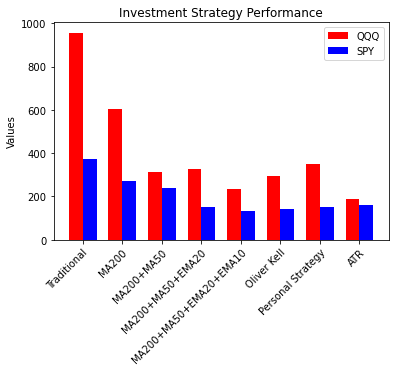

In [90]:
# Grouping the data
strategies = [
    'Traditional', 'MA200', 'MA200+MA50', 
    'MA200+MA50+EMA20', 'MA200+MA50+EMA20+EMA10', 
    'Oliver Kell', 'Personal Strategy', 'ATR'
]

QQQ_values = [
    traditional_investing_value_QQQ, ma200_investing_QQQ, ma200_ma50_investing_QQQ, 
    ma200_ma50_ema20_investing_QQQ, ma200_ma50_ema20_ema10_investing_QQQ, 
    Oliver_Kell_investing_QQQ, Personal_Strategy_investing_QQQ, atr_investing_QQQ
]

SPY_values = [
    traditional_investing_value_SPY, ma200_investing_SPY, ma200_ma50_investing_SPY, 
    ma200_ma50_ema20_investing_SPY, ma200_ma50_ema20_ema10_investing_SPY, 
    Oliver_Kell_investing_SPY, Personal_Strategy_investing_SPY, atr_investing_SPY
]

x = np.arange(len(strategies))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, QQQ_values, width, label='QQQ', color='red')
rects2 = ax.bar(x + width/2, SPY_values, width, label='SPY', color='blue')


ax.set_ylabel('Values')
ax.set_title('Investment Strategy Performance')
ax.set_xticks(x)
ax.set_xticklabels(strategies)
ax.legend()


plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.show()

In [91]:
positions_df

,Date,Stocks,Position Length
0,2005-11-11,[],0
1,2005-11-16,[MAC],1
2,2005-11-29,"[KBH, MAC]",2
3,2005-11-30,[MAC],1
4,2005-12-05,"[MAC, CAH]",2
...,...,...,...
2092,2023-08-21,"[MAC, MACK, BAH, FAT, MAIN, KD, ZG, CACI, TALS...",25
2093,2023-08-22,"[MAC, MACK, BAH, FAT, MAIN, KD, ZG, CACI, TALS...",22
2094,2023-08-23,"[MAC, MACK, BAH, FAT, MAIN, KD, ZG, TALS, ZEUS...",21
2095,2023-08-24,"[MAC, MACK, BAH, FAT, MAIN, KD, ZG, TALS, ZEUS...",19


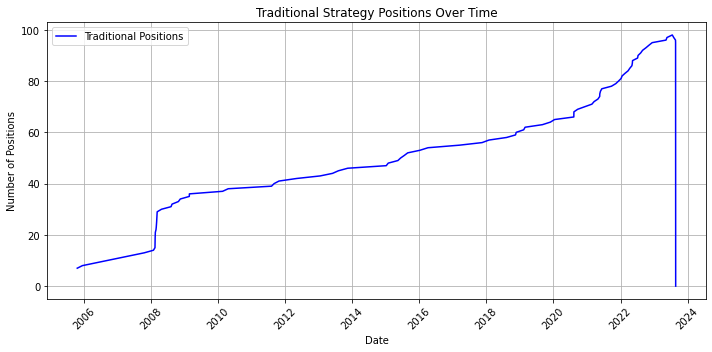

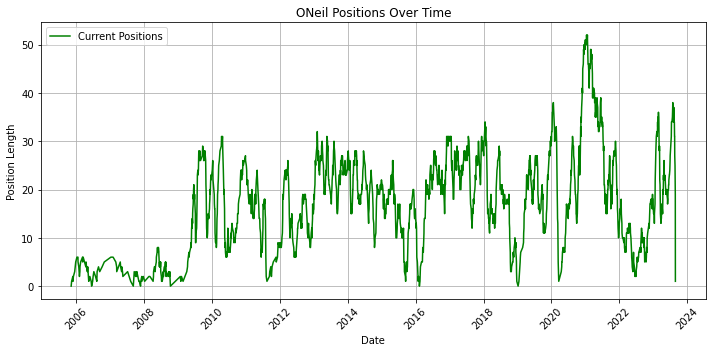

In [92]:

positions_traditional_df['Date'] = pd.to_datetime(positions_traditional_df['Date'])
positions_df['Date'] = pd.to_datetime(positions_df['Date'])

# Plot 
plt.figure(figsize=(10, 5))
plt.plot(positions_traditional_df['Date'], positions_traditional_df['Num_Positions'], label='Traditional Positions', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Positions')
plt.title('Traditional Strategy Positions Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(positions_df['Date'], positions_df['Position Length'], label='Current Positions', color='green')
plt.xlabel('Date')
plt.ylabel('Position Length')
plt.title('ONeil Positions Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


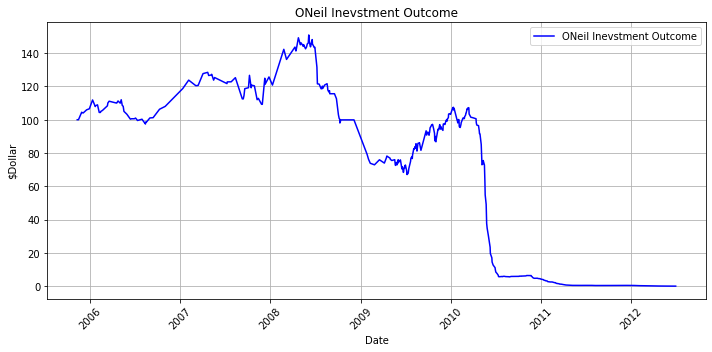

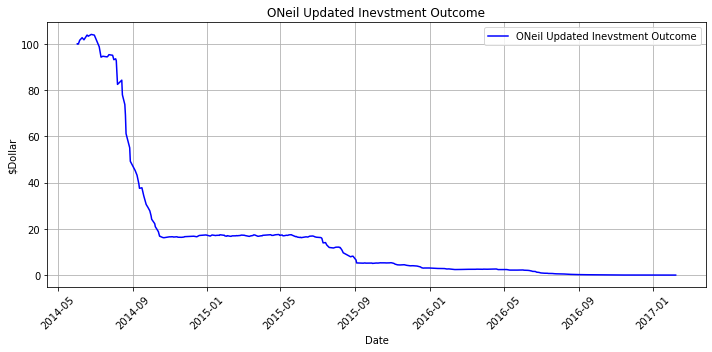

In [93]:

money_account_df['Date'] = pd.to_datetime(money_account_df['Date'])
money_account_updated_df['Date'] = pd.to_datetime(money_account_updated_df['Date'])

# Plot money_account_df
plt.figure(figsize=(10, 5))
plt.plot(money_account_df['Date'], money_account_df['Investment'], label='ONeil Inevstment Outcome', color='blue')
plt.xlabel('Date')
plt.ylabel('$Dollar')
plt.title('ONeil Inevstment Outcome')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot money_account_updated_df
plt.figure(figsize=(10, 5))
plt.plot(money_account_updated_df['Date'], money_account_updated_df['Investment'], label='ONeil Updated Inevstment Outcome', color='blue')
plt.xlabel('Date')
plt.ylabel('$Dollar')
plt.title('ONeil Updated Inevstment Outcome')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



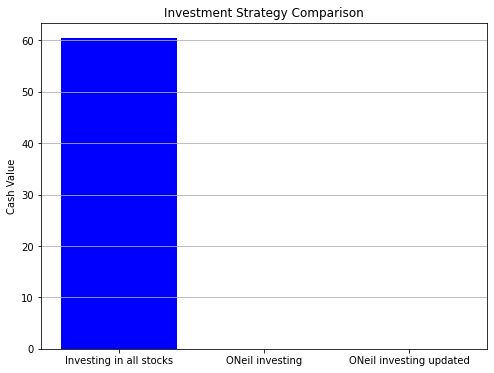

In [94]:

values = [final_traditional_cash, 0, 0]
labels = ["Investing in all stocks", "ONeil investing", "ONeil investing updated"]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'red', 'green'])


plt.title('Stock Strategy Comparisson')
plt.ylabel('Cash Value')
plt.title('Investment Strategy Comparison')
plt.grid(axis='y')

plt.show()
